#Fraud Data
Use Random Forest to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split

In [5]:
fraud=pd.read_csv('/content/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
fraud.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [7]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
fraud.shape

(600, 6)

In [9]:
fraud.info

<bound method DataFrame.info of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [10]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [11]:
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

print(fraud)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [12]:
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)
fraud.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


In [13]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)
fraud_norm=norm_func(fraud.iloc[:,1:])
fraud_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [14]:
x=fraud_norm.drop(['TaxInc_Good'],axis=1)
y=fraud_norm['TaxInc_Good']

In [15]:
cart=DecisionTreeClassifier()
model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=7)
results=cross_val_score(model,x,y,cv=5)
print(results.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7150000000000001


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [17]:
fraud_norm['income']='<=30000'
fraud_norm.loc[fraud['Taxable.Income']>=30000,'income']='Good'
fraud_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [18]:
fraud.drop(['Taxable.Income'],axis=1,inplace=True)

In [19]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
fraud

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

<Figure size 800x800 with 0 Axes>

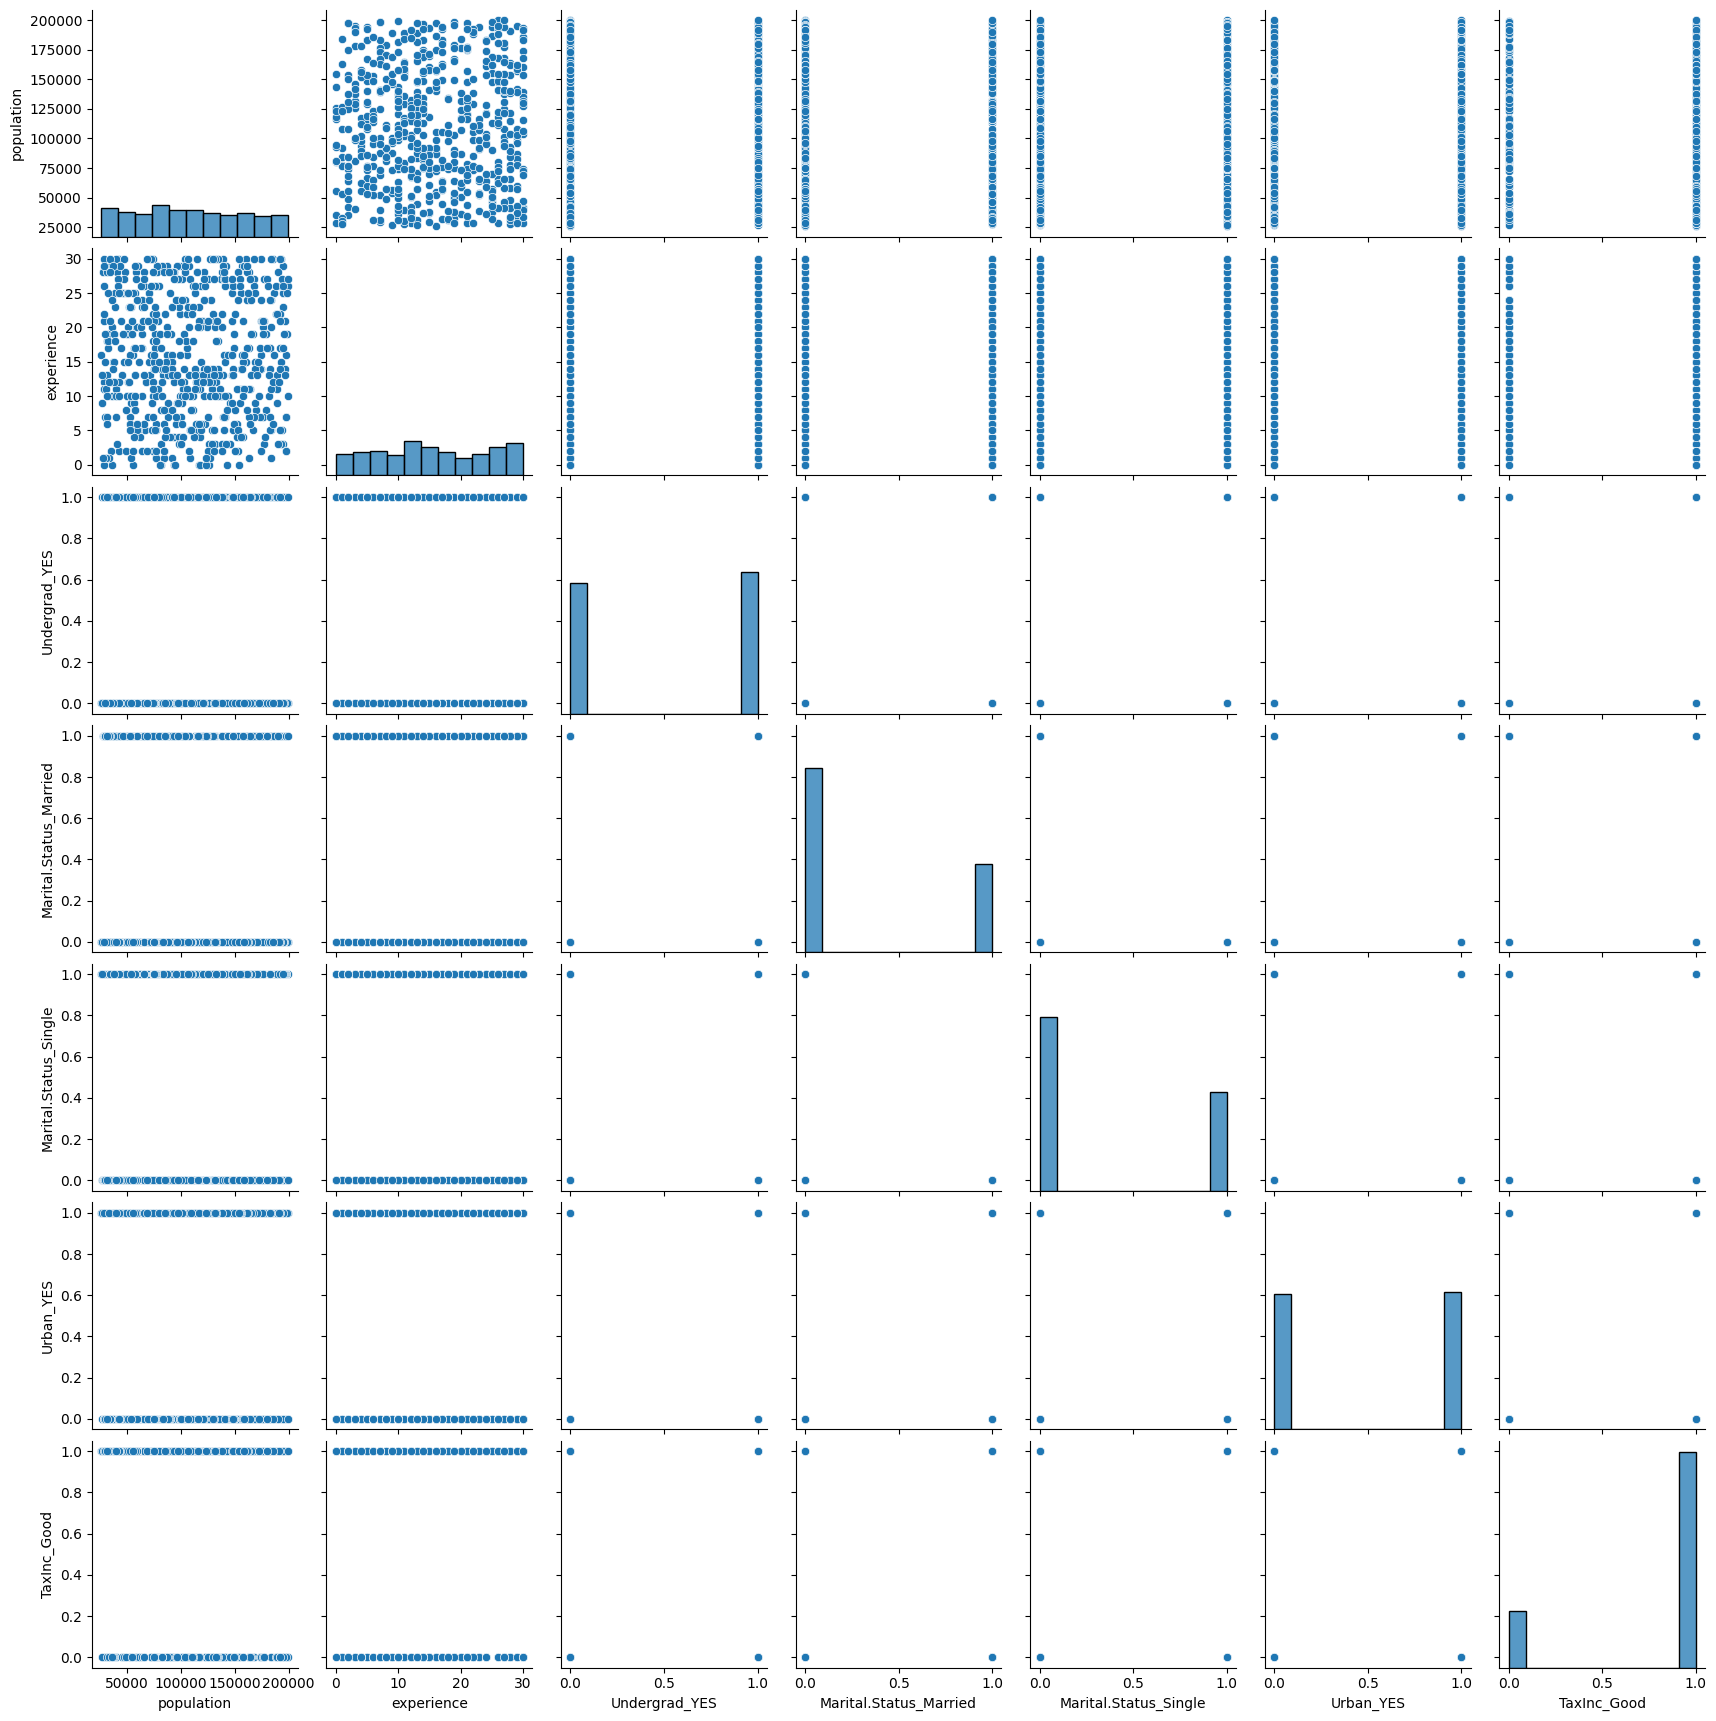

In [20]:
plt.figure(figsize=(8,8))
sns.pairplot(fraud, palette='coolwarm')
plt.show()

<Axes: >

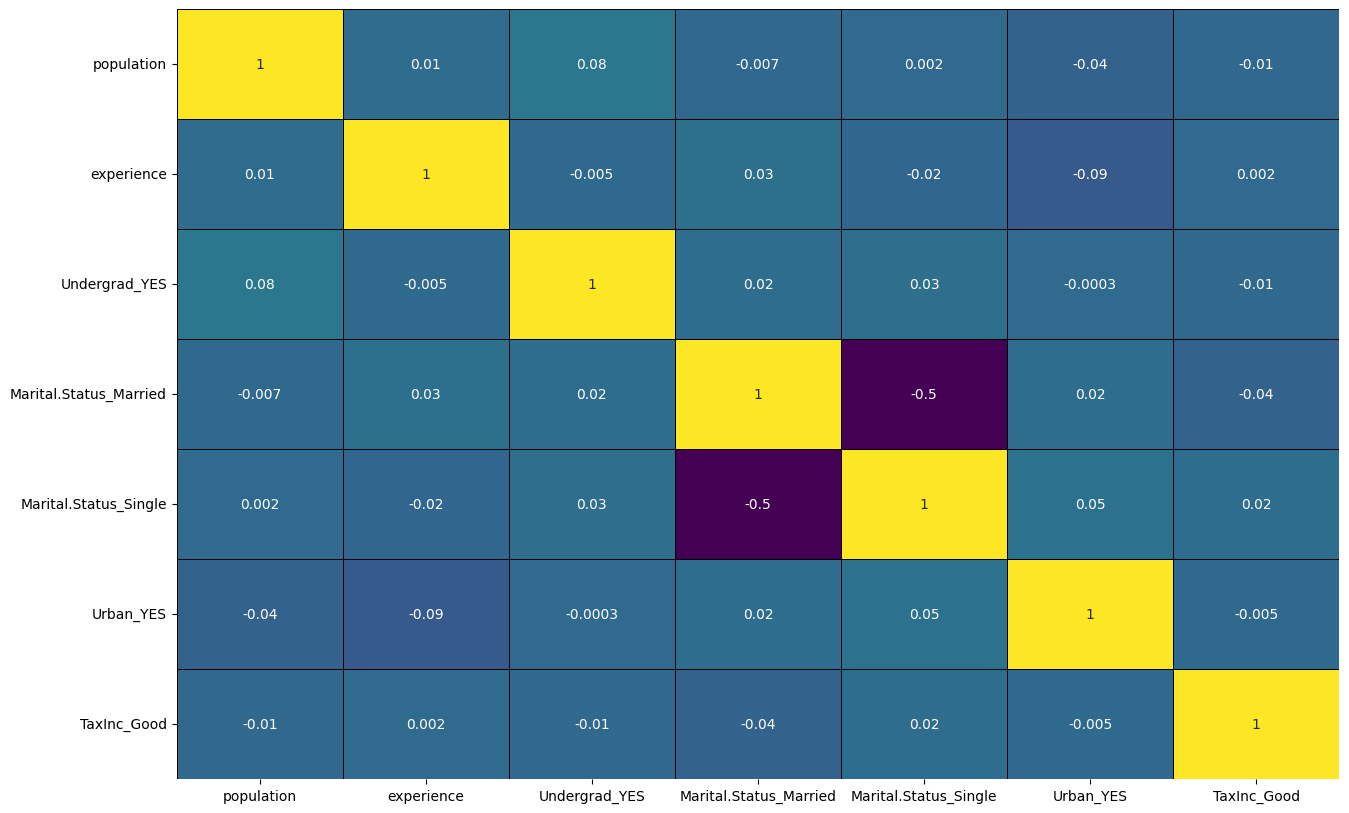

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(fraud.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

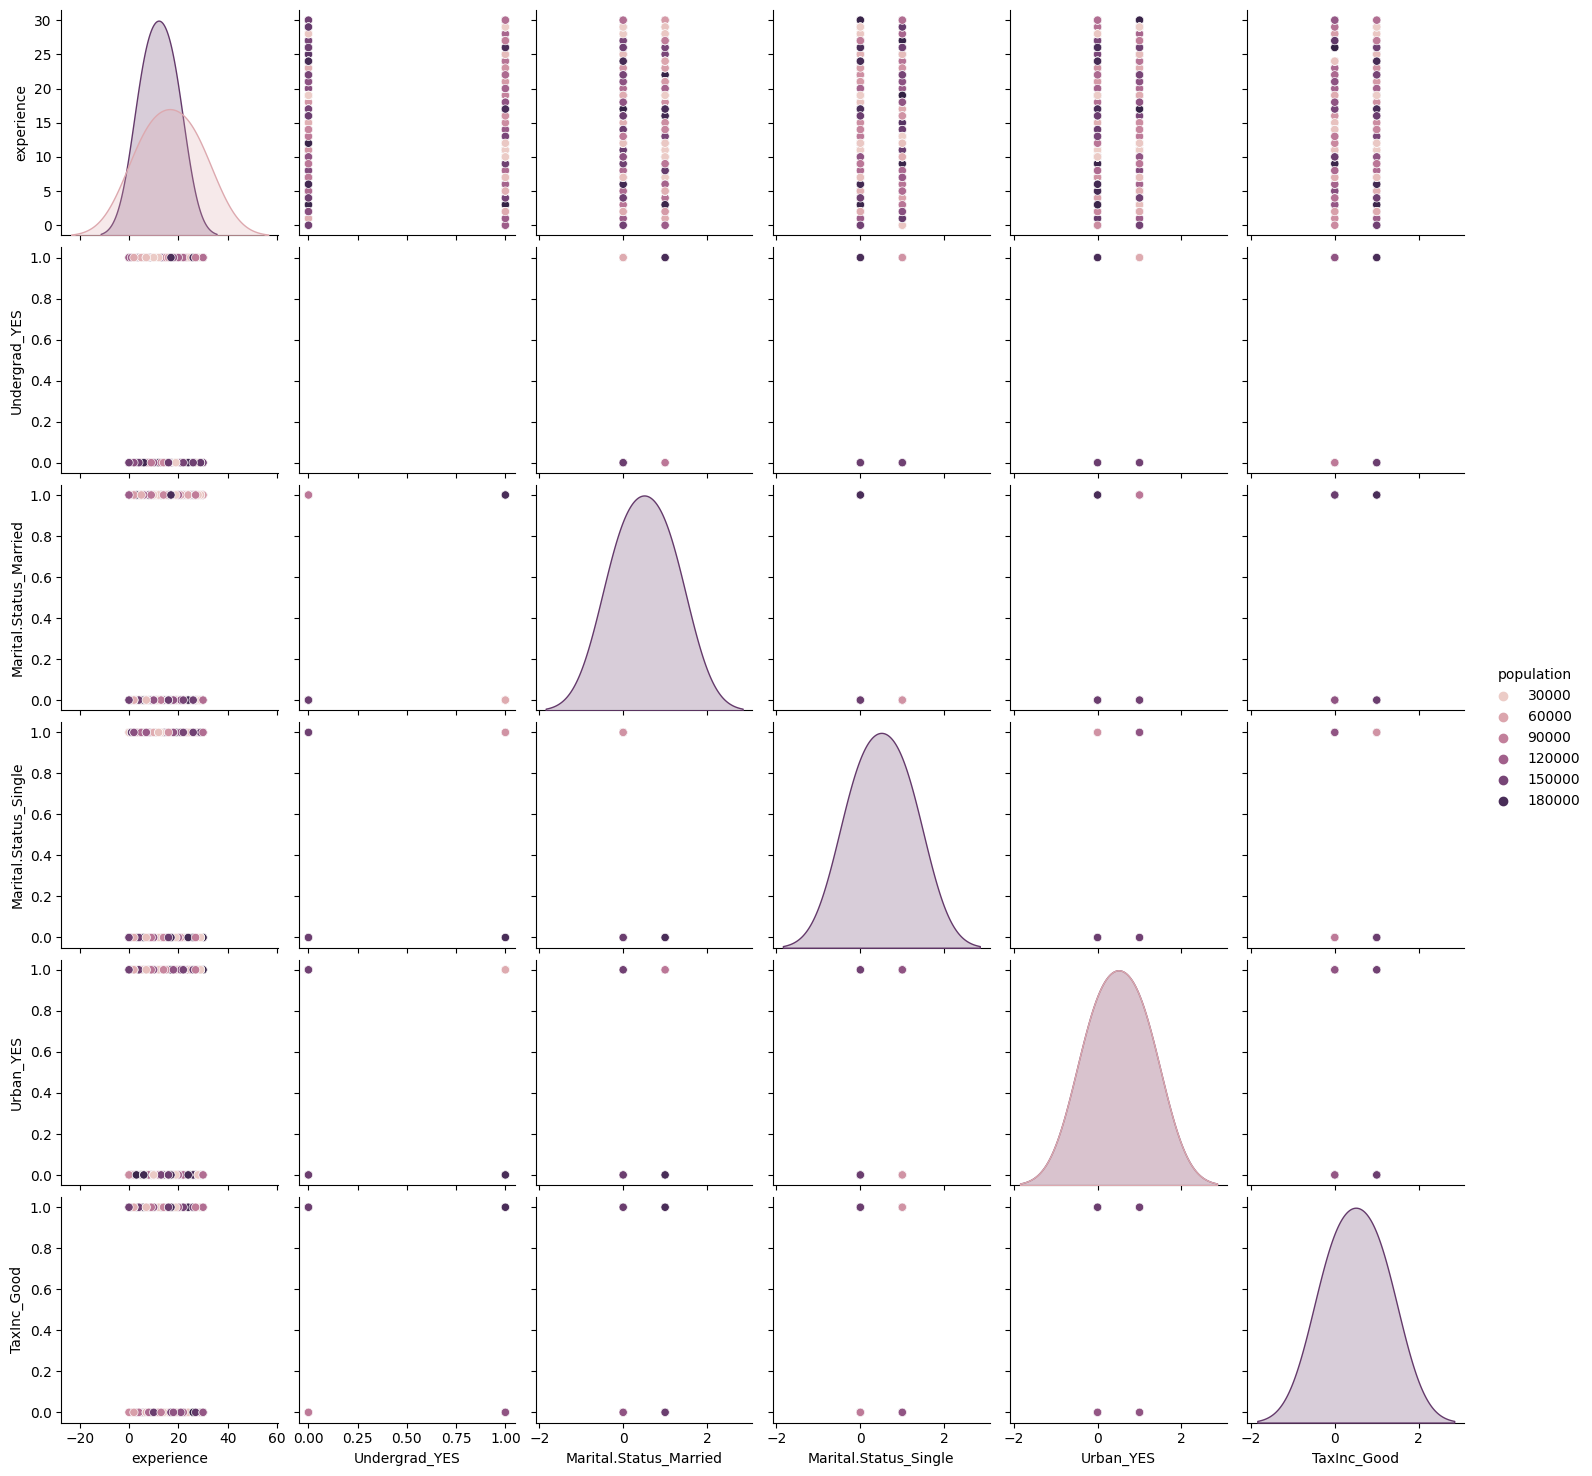

In [22]:
import seaborn as sns
sns.pairplot(data=fraud, hue = 'population')

<Axes: >

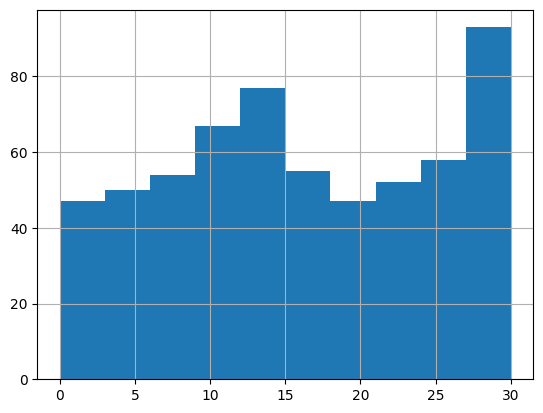

In [23]:
fraud['experience'].hist()

     population  experience  Undergrad_YES  Marital.Status_Married  \
0         50047          10              0                       0   
1        134075          18              1                       0   
2        160205          30              0                       1   
3        193264          15              1                       0   
4         27533          28              0                       1   
..          ...         ...            ...                     ...   
595       39492           7              1                       0   
596       55369           2              1                       0   
597      154058           0              0                       0   
598      180083          17              1                       1   
599      158137          16              0                       0   

     Marital.Status_Single  Urban_YES  TaxInc_Good  
0                        1          1            1  
1                        0          1            1  


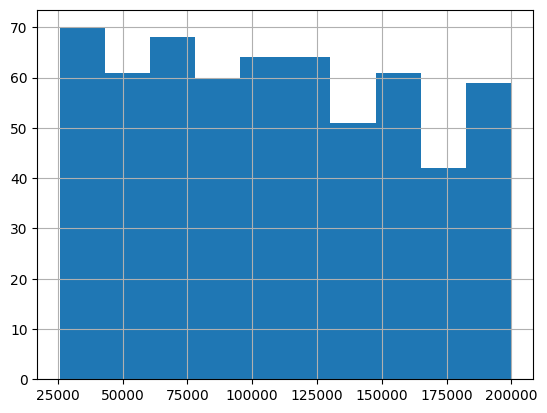

In [24]:
fraud['population'].hist()
print(fraud)

<Figure size 1800x900 with 0 Axes>

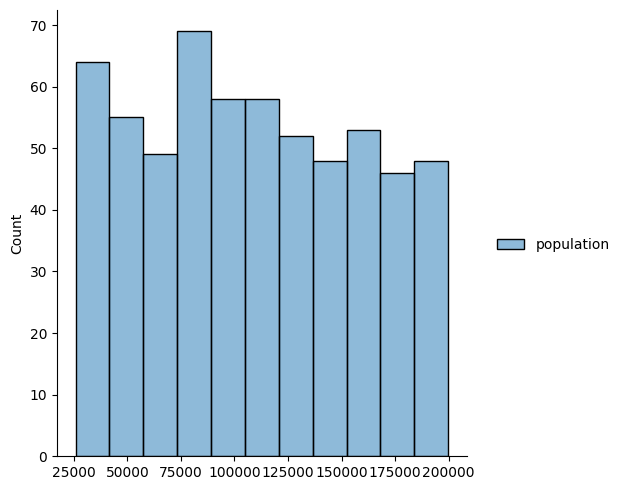

In [25]:
plt.figure(figsize=(18,9))
sns.displot(fraud.iloc[:,:1])
plt.show()

In [27]:
from numpy.random.mtrand import f
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
  if fraud[column_name].dtype == object:
     fraud[column_name] = le.fit_transform(fraud[column_name])
  else:
    pass
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [30]:
bg_clf=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=42)
bg_clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [31]:
Y_pred_test=bg_clf.predict(X_test)

In [32]:
tree_train_pred=pd.DataFrame({'actual':Y_test,'pred':Y_pred_test})
tree_train_pred

,actual,pred
308,0,1
418,0,1
258,1,0
211,1,0
110,1,0
...,...,...
375,0,1
461,1,1
183,1,1
374,1,1


In [35]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = fraud_norm.drop(['TaxInc_Good'], axis=1)
Y = fraud_norm['TaxInc_Good']

model = RandomForestClassifier(n_estimators=100, max_features=3)
result1 = cross_val_score(model, x, y, cv=10)
print(result1.mean())

0.7466666666666667


In [36]:
model.fit(X_train,Y_train)

RandomForestClassifier(max_features=3)

In [37]:
preds=model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        60
           1       0.55      0.60      0.57        60

    accuracy                           0.55       120
   macro avg       0.55      0.55      0.55       120
weighted avg       0.55      0.55      0.55       120



In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

params_grid = {"n_estimators": [200, 250, 400, 500, 800, 1000],
    "max_depth": [5, 7, 9, 10, 12, 14],
    "min_samples_leaf": range(2, 10),
    "min_samples_split": [4, 8, 10, 12, 15, 18, 20],
    "max_leaf_nodes": range(4, 21)}

dt_estimator = RandomizedSearchCV(RandomForestClassifier(random_state=0), param_distributions=params_grid, cv=10, random_state=0, n_jobs=-1 )

dt_estimator.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 10, 12, 14],
                                        'max_leaf_nodes': range(4, 21),
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': [4, 8, 10, 12, 15,
                                                              18, 20],
                                        'n_estimators': [200, 250, 400, 500,
                                                         800, 1000]},
                   random_state=0)

In [40]:
dt_estimator.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 14,
 'max_depth': 14}

In [41]:
pred1 = dt_estimator.predict(X_test)

In [42]:
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

           0       0.55      0.52      0.53        60
           1       0.55      0.58      0.56        60

    accuracy                           0.55       120
   macro avg       0.55      0.55      0.55       120
weighted avg       0.55      0.55      0.55       120

